In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train= pd.read_csv("C:\\Users\\97433\\Desktop\\IP Project\\train.csv")
test= pd.read_csv("C:\\Users\\97433\\Desktop\\IP Project\\test.csv")

In [4]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [5]:
train.size

353412

In [6]:
train.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

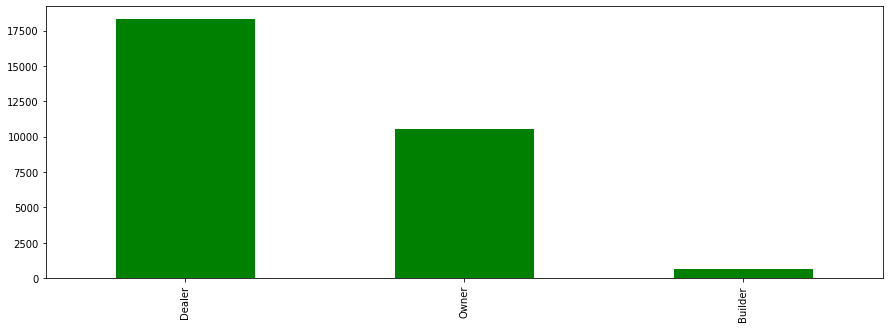

In [7]:
plt.figure(figsize=(15,5))
train['POSTED_BY'].value_counts().plot(kind='bar',color='g')
plt.show()

In [8]:
for column in train:
  uniq_val = np.unique(train[column])
  np_val = len(uniq_val)
  if np_val < 10:
    print("The number of values for feature {} is: {} -- {}".format(column, np_val, uniq_val))
  else:
    print("The number of values for feature {} is: {}".format(column, np_val)) 

The number of values for feature POSTED_BY is: 3 -- ['Builder' 'Dealer' 'Owner']
The number of values for feature UNDER_CONSTRUCTION is: 2 -- [0 1]
The number of values for feature RERA is: 2 -- [0 1]
The number of values for feature BHK_NO. is: 16
The number of values for feature BHK_OR_RK is: 2 -- ['BHK' 'RK']
The number of values for feature SQUARE_FT is: 19561
The number of values for feature READY_TO_MOVE is: 2 -- [0 1]
The number of values for feature RESALE is: 2 -- [0 1]
The number of values for feature ADDRESS is: 6899
The number of values for feature LONGITUDE is: 4087
The number of values for feature LATITUDE is: 4078
The number of values for feature TARGET(PRICE_IN_LACS) is: 1172


In [9]:
train['CITY'] = train['ADDRESS'].str.split(",").str[-1]
train1 = train.drop('ADDRESS', axis = 1)
train1.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,Bangalore
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5,Kolkata


C:\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='Density'>

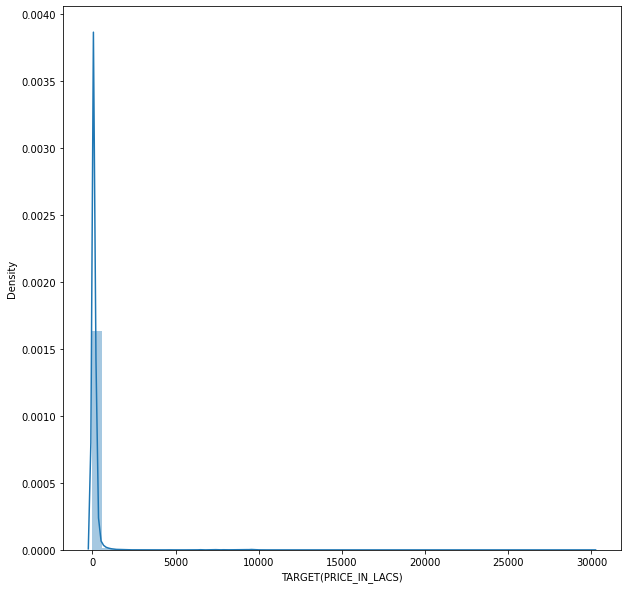

In [10]:
plt.figure(figsize = (10,10))
import seaborn as sns
sns.distplot(train1['TARGET(PRICE_IN_LACS)'])

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='Count'>

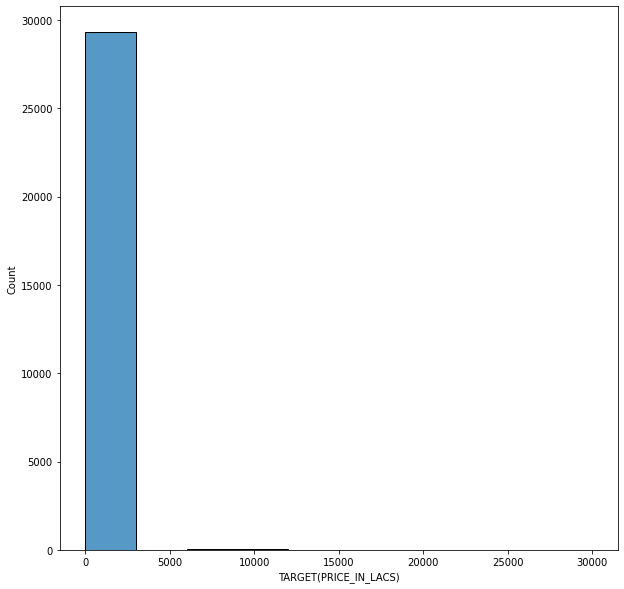

In [11]:
plt.figure(figsize = (10,10))
sns.histplot(train1['TARGET(PRICE_IN_LACS)'], bins = 10)

<AxesSubplot:xlabel='SQUARE_FT', ylabel='Count'>

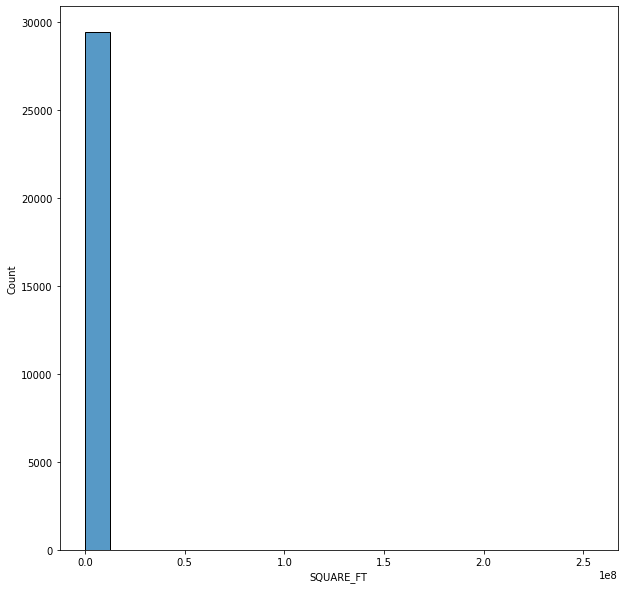

In [12]:
plt.figure(figsize = (10,10))
sns.histplot(train1['SQUARE_FT'], bins = 20)

In [13]:
train1['SQUARE_FT'] = np.log(train1['SQUARE_FT'])

<AxesSubplot:xlabel='LATITUDE', ylabel='Count'>

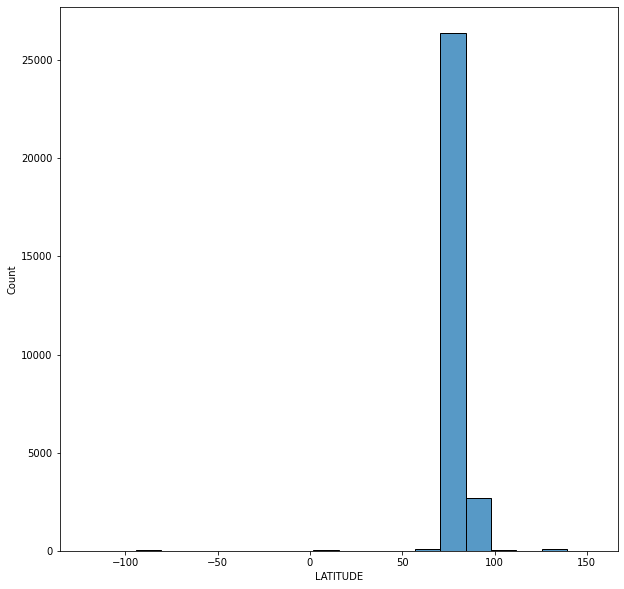

In [14]:
plt.figure(figsize = (10,10))
sns.histplot(train1['LATITUDE'], bins = 20)

In [15]:
train1['LONGITUDE'] = np.log(train1['LONGITUDE'] )
train1['LATITUDE'] = np.log(train1['LATITUDE'] )

C:\Python\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
train1.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY
0,Owner,0,0,2,BHK,7.170301,1,1,2.562632,4.351541,55.0,Bangalore
1,Dealer,0,0,2,BHK,7.150701,1,1,2.507527,4.339179,51.0,Mysore
2,Owner,0,0,2,BHK,6.838576,1,1,2.547728,4.351982,43.0,Bangalore
3,Owner,0,1,2,BHK,6.835100,1,1,3.354885,4.348269,62.5,Ghaziabad
4,Dealer,1,0,2,BHK,6.906764,0,1,3.117605,4.482832,60.5,Kolkata


In [17]:
def citiesloc(city):
    if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune', 'Maharashtra']:
        return 'type1'
    elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 
                  'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 
                  'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Bhilai', 'Durgapur', 'Dindigul', 'Erode', 
                  'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati', 
                  'Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 
                  'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 
                  'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad', 
                  'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 
                  'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Ratlam', 'Salem', 'Sangli', 'Shimla', 'Siliguri', 
                  'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 
                  'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 
                  'Vellore', 'Warangal']:
        return 'type2'
    else:
        return 'type3'
    
train1['cities'] = train1['CITY'].apply(citiesloc)

In [18]:
train1.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),CITY,cities
0,Owner,0,0,2,BHK,7.170301,1,1,2.562632,4.351541,55.0,Bangalore,type1
1,Dealer,0,0,2,BHK,7.150701,1,1,2.507527,4.339179,51.0,Mysore,type2
2,Owner,0,0,2,BHK,6.838576,1,1,2.547728,4.351982,43.0,Bangalore,type1
3,Owner,0,1,2,BHK,6.835100,1,1,3.354885,4.348269,62.5,Ghaziabad,type2
4,Dealer,1,0,2,BHK,6.906764,0,1,3.117605,4.482832,60.5,Kolkata,type1


In [19]:
train2 = train1.drop('CITY', axis = 1)
train2.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),cities
0,Owner,0,0,2,BHK,7.170301,1,1,2.562632,4.351541,55.0,type1
1,Dealer,0,0,2,BHK,7.150701,1,1,2.507527,4.339179,51.0,type2
2,Owner,0,0,2,BHK,6.838576,1,1,2.547728,4.351982,43.0,type1
3,Owner,0,1,2,BHK,6.835100,1,1,3.354885,4.348269,62.5,type2
4,Dealer,1,0,2,BHK,6.906764,0,1,3.117605,4.482832,60.5,type1


In [20]:
features = ['POSTED_BY', 'BHK_OR_RK', 'cities']
train3= pd.get_dummies(train2, columns = features)

In [21]:
train3.isna().sum()

UNDER_CONSTRUCTION        0
RERA                      0
BHK_NO.                   0
SQUARE_FT                 0
READY_TO_MOVE             0
RESALE                    0
LONGITUDE                12
LATITUDE                 83
TARGET(PRICE_IN_LACS)     0
POSTED_BY_Builder         0
POSTED_BY_Dealer          0
POSTED_BY_Owner           0
BHK_OR_RK_BHK             0
BHK_OR_RK_RK              0
cities_type1              0
cities_type2              0
cities_type3              0
dtype: int64

In [22]:
train3.dropna(subset=['LATITUDE'], how='all', inplace=True)
train3.dropna(subset=['LONGITUDE'], how='all', inplace=True)

<AxesSubplot:xlabel='TARGET(PRICE_IN_LACS)', ylabel='SQUARE_FT'>

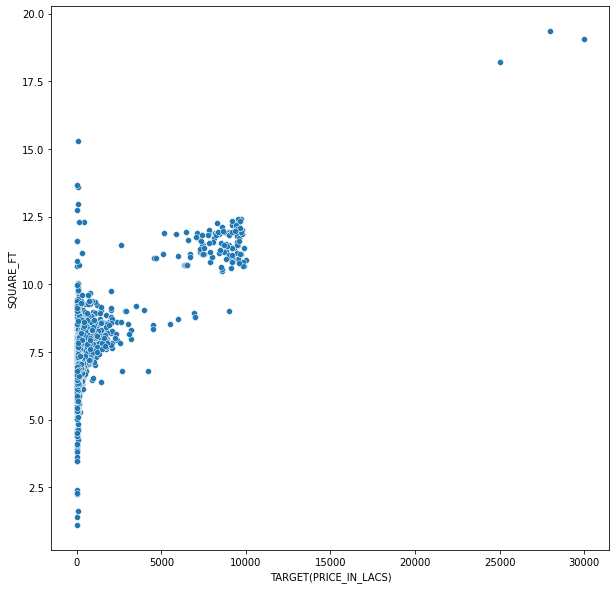

In [23]:
plt.figure(figsize = (10,10))
sns.scatterplot(data=train3, x = 'TARGET(PRICE_IN_LACS)', y = 'SQUARE_FT')

In [24]:
from sklearn.model_selection import train_test_split
X = train3.drop('TARGET(PRICE_IN_LACS)', axis = 1)
y = train3['TARGET(PRICE_IN_LACS)']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 100)
y_train

29378    120.0
14660    470.0
16097     75.0
12025     60.0
5055      51.0
         ...  
12157     50.0
24495    100.0
14189     38.9
23385     85.2
5657      65.0
Name: TARGET(PRICE_IN_LACS), Length: 20549, dtype: float64

In [25]:
y_train.size

20549

In [26]:
y_train.shape

(20549,)

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, log_loss, classification_report, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor


from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [28]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

preds = dt.predict(X_train)

r2_score(y_train, preds)

0.9999711666333725

[]

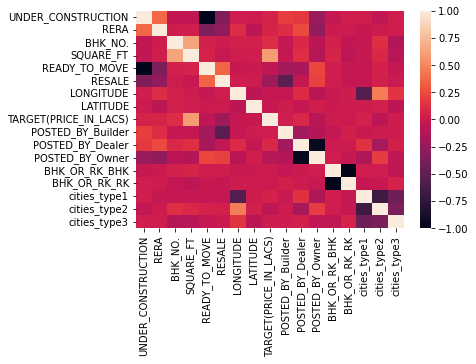

In [29]:
import seaborn as sns
sns.heatmap(train3.corr())
plt.plot()

In [30]:
for column in test:
  uniq_val = np.unique(train[column])
  np_val = len(uniq_val)
  if np_val < 10:
    print("The number of values for feature {} is: {} -- {}".format(column, np_val, uniq_val))
  else:
    print("The number of values for feature {} is: {}".format(column, np_val)) 

The number of values for feature POSTED_BY is: 3 -- ['Builder' 'Dealer' 'Owner']
The number of values for feature UNDER_CONSTRUCTION is: 2 -- [0 1]
The number of values for feature RERA is: 2 -- [0 1]
The number of values for feature BHK_NO. is: 16
The number of values for feature BHK_OR_RK is: 2 -- ['BHK' 'RK']
The number of values for feature SQUARE_FT is: 19561
The number of values for feature READY_TO_MOVE is: 2 -- [0 1]
The number of values for feature RESALE is: 2 -- [0 1]
The number of values for feature ADDRESS is: 6899
The number of values for feature LONGITUDE is: 4087
The number of values for feature LATITUDE is: 4078


In [31]:
test['CITY'] = test['ADDRESS'].str.split(",").str[-1]
test1 = test.drop('ADDRESS', axis = 1)
test1.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,CITY
0,Owner,0,0,1,BHK,545.171340,1,1,21.262000,73.047700,Surat
1,Dealer,1,1,2,BHK,800.000000,0,0,18.966114,73.148278,Lalitpur
2,Dealer,0,0,2,BHK,1257.096513,1,1,22.592200,88.484911,Kolkata
3,Dealer,0,0,3,BHK,1400.329489,1,1,26.988300,75.584600,Jaipur
4,Owner,0,0,1,BHK,430.477830,1,1,22.700000,72.870000,Nadiad


In [32]:
test1['SQUARE_FT'] = np.log(test1['SQUARE_FT'])

In [33]:
test1['LONGITUDE'] = np.log(test1['LONGITUDE'] )
test1['LATITUDE'] = np.log(test1['LATITUDE'] )

C:\Python\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [34]:
test1.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,CITY
0,Owner,0,0,1,BHK,6.301100,1,1,3.056921,4.291113,Surat
1,Dealer,1,1,2,BHK,6.684612,0,0,2.942654,4.292489,Lalitpur
2,Dealer,0,0,2,BHK,7.136560,1,1,3.117605,4.482832,Kolkata
3,Dealer,0,0,3,BHK,7.244463,1,1,3.295403,4.325253,Jaipur
4,Owner,0,0,1,BHK,6.064896,1,1,3.122365,4.288677,Nadiad


In [35]:
test1['cities'] = test1['CITY'].apply(citiesloc)
test1.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,CITY,cities
0,Owner,0,0,1,BHK,6.301100,1,1,3.056921,4.291113,Surat,type2
1,Dealer,1,1,2,BHK,6.684612,0,0,2.942654,4.292489,Lalitpur,type3
2,Dealer,0,0,2,BHK,7.136560,1,1,3.117605,4.482832,Kolkata,type1
3,Dealer,0,0,3,BHK,7.244463,1,1,3.295403,4.325253,Jaipur,type2
4,Owner,0,0,1,BHK,6.064896,1,1,3.122365,4.288677,Nadiad,type3


In [36]:
test2 = test1.drop('CITY', axis = 1)
test2.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,cities
0,Owner,0,0,1,BHK,6.301100,1,1,3.056921,4.291113,type2
1,Dealer,1,1,2,BHK,6.684612,0,0,2.942654,4.292489,type3
2,Dealer,0,0,2,BHK,7.136560,1,1,3.117605,4.482832,type1
3,Dealer,0,0,3,BHK,7.244463,1,1,3.295403,4.325253,type2
4,Owner,0,0,1,BHK,6.064896,1,1,3.122365,4.288677,type3


In [37]:
features = ['POSTED_BY', 'BHK_OR_RK', 'cities']
test3= pd.get_dummies(test2, columns = features)

In [38]:
test3.isna().sum()

UNDER_CONSTRUCTION      0
RERA                    0
BHK_NO.                 0
SQUARE_FT               0
READY_TO_MOVE           0
RESALE                  0
LONGITUDE              26
LATITUDE              188
POSTED_BY_Builder       0
POSTED_BY_Dealer        0
POSTED_BY_Owner         0
BHK_OR_RK_BHK           0
BHK_OR_RK_RK            0
cities_type1            0
cities_type2            0
cities_type3            0
dtype: int64

In [39]:
test3.dropna(subset=['LATITUDE'], how='all', inplace=True)
test3.dropna(subset=['LONGITUDE'], how='all', inplace=True)

In [40]:
pred_test=dt.predict(test3)

pred_test

array([  21. ,   72. ,   65.1, ..., 8610. ,   84.4,  600. ])

In [41]:
pred_df=pd.DataFrame(pred_test)
pred_df

,0
0,21.0
1,72.0
2,65.1
3,26.0
4,10.0
...,...
68502,160.0
68503,120.0
68504,8610.0
68505,84.4


In [42]:
pred_df.idxmax(axis=0)

0    42607
dtype: int64

In [43]:
test3.loc[[42607]]

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK,cities_type1,cities_type2,cities_type3
42607,0,0,2,6.872188,1,1,3.354614,4.349908,0,0,1,1,0,0,1,0


In [44]:
import pickle
with open("Price_Prediction.pickle",'wb')as f:
    pickle.dump(dt,f)

In [45]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))